<a href="https://colab.research.google.com/github/DinhQuocTuan0108/Bai-tap/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/Colab_Notebooks/FOOD/

/content/drive/MyDrive/Colab_Notebooks/FOOD


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/FOOD/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1498 images belonging to 10 classes.


In [5]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/FOOD/VALIDATION',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 10 images belonging to 10 classes.


In [6]:
training_set.class_indices

{'banh cuon': 0,
 'banh mi': 1,
 'banh pia': 2,
 'banh tet': 3,
 'banh xeo': 4,
 'bun dau mam tom': 5,
 'ca kho to': 6,
 'com tam': 7,
 'nem': 8,
 'pho': 9}

In [7]:
validation.class_indices

{'banh cuon': 0,
 'banh mi': 1,
 'banh pia': 2,
 'banh tet': 3,
 'banh xeo': 4,
 'bun dau mam tom': 5,
 'ca kho to': 6,
 'com tam': 7,
 'nem': 8,
 'pho': 9}

In [8]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [9]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=120,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/120
47/47 [==============================] - 315s 6s/step - loss: 2.0820 - accuracy: 0.2503 - val_loss: 1.5631 - val_accuracy: 0.0000e+00
Epoch 2/120
47/47 [==============================] - 30s 640ms/step - loss: 1.5010 - accuracy: 0.3758 - val_loss: 1.8636 - val_accuracy: 0.1000
Epoch 3/120
47/47 [==============================] - 30s 641ms/step - loss: 1.2107 - accuracy: 0.5220 - val_loss: 1.3010 - val_accuracy: 0.5000
Epoch 4/120
47/47 [==============================] - 30s 621ms/step - loss: 1.0345 - accuracy: 0.6041 - val_loss: 1.0217 - val_accuracy: 0.7000
Epoch 5/120
47/47 [==============================] - 30s 637ms/step - loss: 0.9352 - accuracy: 0.6535 - val_loss: 1.2882 - val_accuracy: 0.5000
Epoch 6/120
47/47 [==============================] - 31s 656ms/step - loss: 0.8579 - accuracy: 0.6929 - val_loss: 1.1410 - val_accuracy: 0.4000
Epoch 7/120
47/47 [==============================] - 29s 627ms/step - loss: 0.7904 - accuracy: 0.7056 - val_loss: 0.9440 - val_accurac

In [10]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.07108741998672485
Train Accuracy 0.9773030877113342


<function matplotlib.pyplot.show(*args, **kw)>

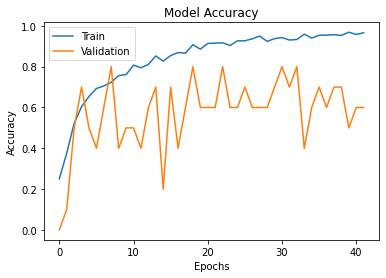

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [12]:
model.save("Food.h5")

In [13]:
model_CNN=load_model('Food.h5')

1/1 [==============================] - 0s 360ms/step
BANH CUON


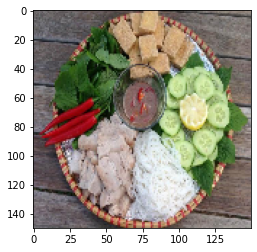

1/1 [==============================] - 0s 17ms/step
BANH CUON


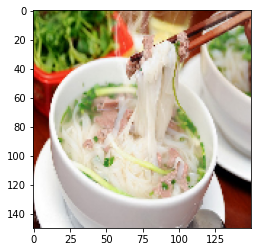

1/1 [==============================] - 0s 16ms/step
PHO


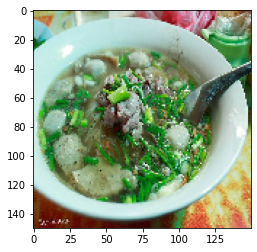

1/1 [==============================] - 0s 17ms/step
PHO


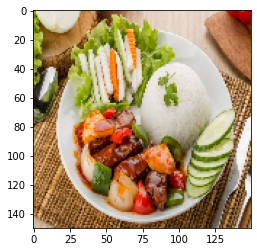

1/1 [==============================] - 0s 16ms/step
BANH CUON


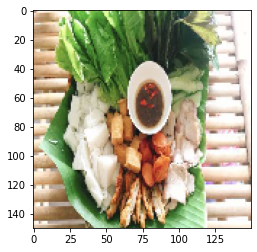

1/1 [==============================] - 0s 16ms/step
BANH CUON


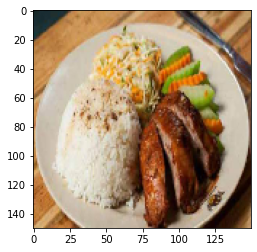

1/1 [==============================] - 0s 15ms/step
BANH PIA


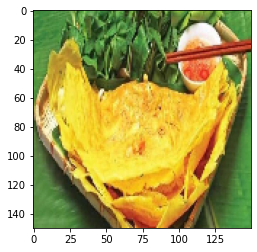

1/1 [==============================] - 0s 19ms/step
BANH MI


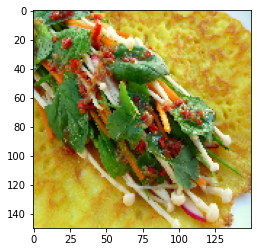

In [15]:
test="/content/drive/MyDrive/Colab_Notebooks/FOOD/TEST/Test1"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BANH CUON'
  if round(result[0][1])==1:
    prediction='BANH MI'
  if round(result[0][2])==1:
    prediction='BANH PIA'
  if round(result[0][3])==1:
    prediction='BANH TET'
  if round(result[0][4])==1:
    prediction='BANH XEO'
  if round(result[0][5])==1:
    prediction='BUN DAU MAM TOM'
  if round(result[0][6])==1:
    prediction='CA KHO TO'
  if round(result[0][7])==1:
    prediction='COM TAM'
  if round(result[0][8])==1:
    prediction='NEM'
  if round(result[0][9])==1:
    prediction='PHO'
  print(prediction)
  plt.show()